In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [2]:
import time
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

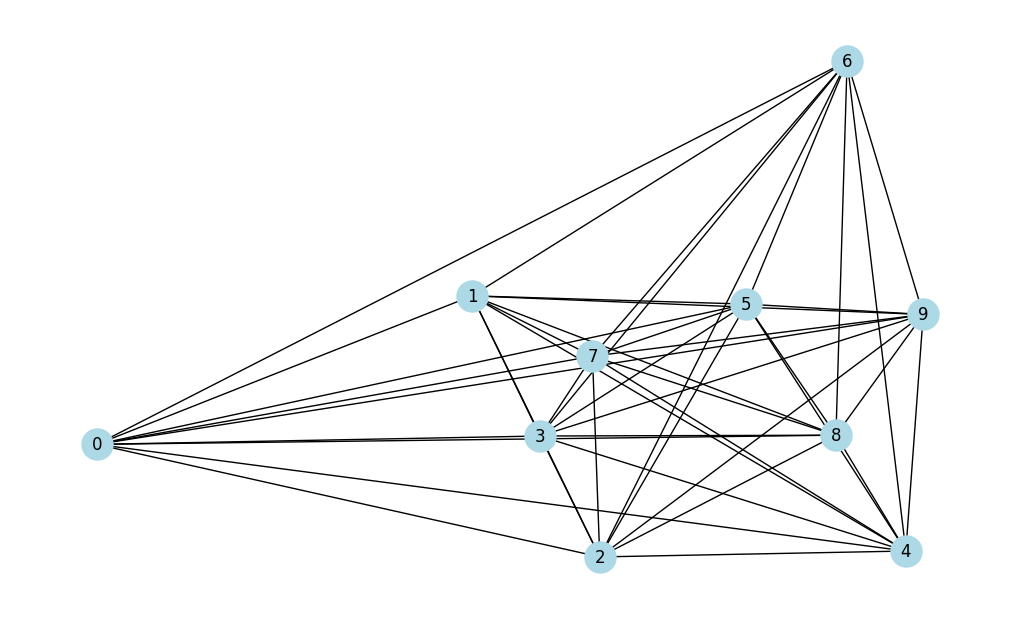

In [4]:
G = gnp_random_connected_graph(10, 1, False, True)

# For Task 1

## Kruskal's algorithm

In [5]:
from networkx.algorithms import tree

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

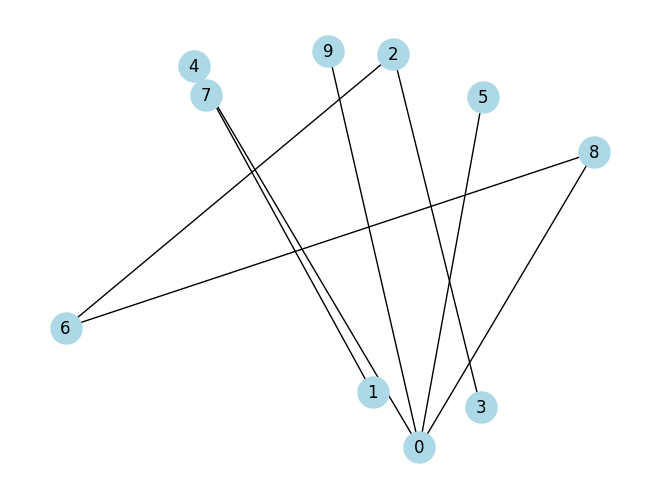

In [7]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 8), (0, 4), (0, 9), (0, 5), (1, 4), (2, 6), (2, 3), (4, 7), (6, 8)]),
 9)

In [9]:
def kruskal(G):

    edges = sorted(G.edges(data=True), key=lambda x: x[-1]['weight']) # sort edges by weight

    nodes_set = [{x} for x in list(G.nodes())]                        # create a set for each node

    i = 0
    res = nx.Graph()
    while len(nodes_set) > 1:                                         # while there are more than one set
        edge = edges[i]
        in_cycle = False
        nodes_in = []
        for grp in nodes_set:     
            if edge[0] in grp and edge[1] in grp:         
                in_cycle = True
                break
            if edge[0] in grp or edge[1] in grp:              
                nodes_in.append(grp)
                if len(nodes_in) == 2:
                    break
        if not in_cycle:
            for set_ in nodes_in: 
                nodes_set.remove(set_)
            new_set = nodes_in[0] | nodes_in[1]
            nodes_set.append(new_set)
            res.add_edge(edge[0], edge[1], weight=edge[2]['weight'])
        i+=1
    return res
            
kruskal(G).edges(), len(kruskal(G).edges())

(EdgeView([(0, 8), (0, 4), (0, 9), (0, 5), (8, 6), (1, 4), (4, 7), (6, 2), (2, 3)]),
 9)

## Prim's algorithm

In [10]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

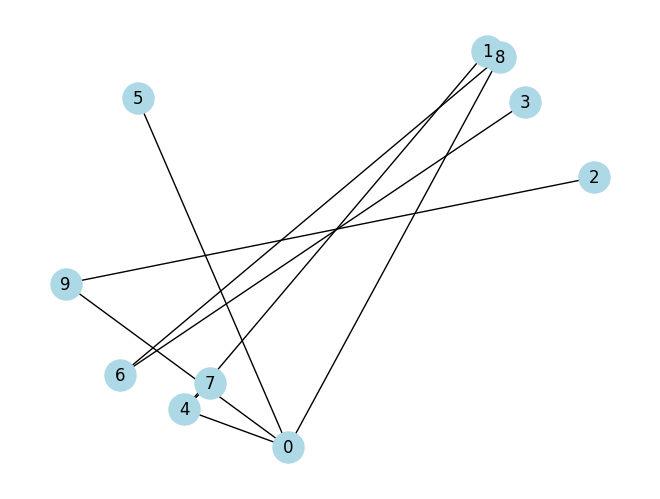

In [11]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [12]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 8), (0, 4), (0, 9), (0, 5), (1, 4), (2, 9), (3, 6), (4, 7), (6, 8)]),
 9)

In [13]:
def prim(G):
    '''
    Prim's algorithm for finding the minimum spanning tree
    '''
    edges = sorted(list(G.edges(data=True)), key=lambda x: x[2]['weight']) #sort edges by weight
    start_edge = edges[0]
    visited = {start_edge[0], start_edge[1]}
    result = nx.Graph()
    result.add_edge(start_edge[0], start_edge[1], weight=start_edge[2]['weight']) #add the first edge to the result
    edges.pop(0)
    while len(visited)!=len(G.nodes):
        for edge in edges:
            if edge[0] in visited and edge[1] in visited: #if both nodes are already visited, skip
                continue
            if edge[0] in visited or edge[1] in visited: #if one of the nodes is visited, add the edge to the result
                result.add_edge(edge[0], edge[1], weight=edge[2]['weight'])
                visited.add(edge[0])
                visited.add(edge[1])
                edges.remove(edge)
                break
    return result

prim(G).edges(), len(prim(G).edges())

(EdgeView([(0, 8), (0, 4), (0, 9), (0, 5), (8, 6), (4, 1), (4, 7), (6, 2), (2, 3)]),
 9)

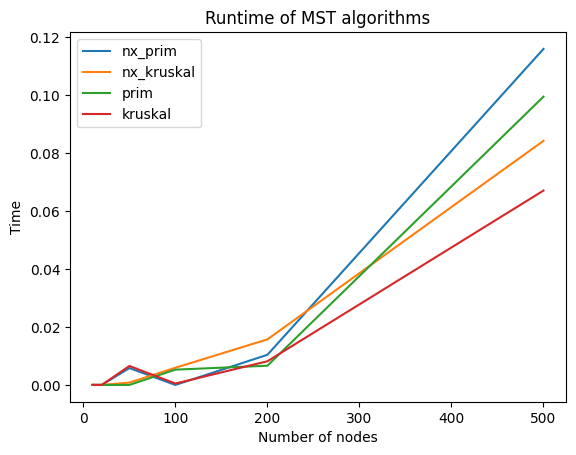

In [14]:
#compare nx and own implementation runtime for different number of nodes
range_=[10,20,50,100,200,500]
times={'nx_prim':{range__ : [] for range__ in range_}, 
       'nx_kruskal':{range__ : [] for range__ in range_},
       'prim':{range__ : [] for range__ in range_}, 
       'kruskal':{range__ : [] for range__ in range_}}
for j in range(100):
    for i in range_:
        G = gnp_random_connected_graph(i, 0.4, False, False)
        start = time.time()
        tree.minimum_spanning_tree(G, algorithm="prim")
        end = time.time()
        times['nx_prim'][i].append(end-start)
        start = time.time()
        tree.minimum_spanning_tree(G, algorithm="kruskal")
        end = time.time()
        times['nx_kruskal'][i].append(end-start)
        start = time.time()
        _=prim(G)
        end = time.time()
        times['prim'][i].append(end-start)
        start = time.time()
        _=kruskal(G)
        end = time.time()
        times['kruskal'][i].append(end-start)

for key in times.keys():
    for k in times[key].keys():
        times[key][k] = sum(times[key][k])/len(times[key][k])
    times[key]=list(times[key].values())

plt.plot(range_, times['nx_prim'], label='nx_prim')
plt.plot(range_, times['nx_kruskal'], label='nx_kruskal')
plt.plot(range_, times['prim'], label='prim')
plt.plot(range_, times['kruskal'], label='kruskal')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Time')
plt.title('Runtime of MST algorithms')
plt.show()

# For Task 2

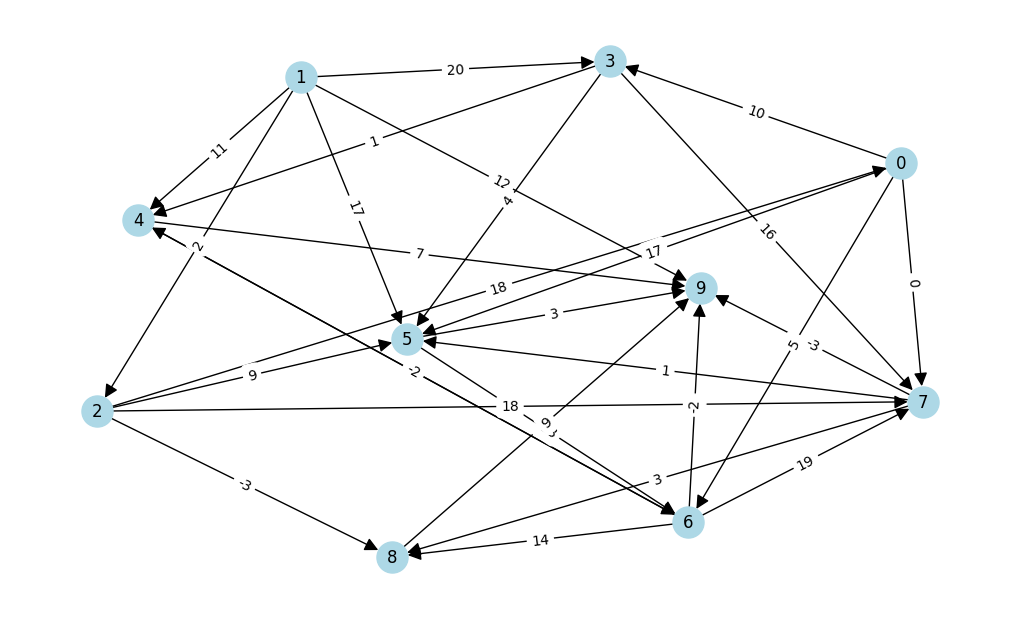

In [15]:
G = gnp_random_connected_graph(10, 0.5, True, True)

## Bellman-Ford algorithm

In [16]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [17]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

Distance to 0: 0
Distance to 3: 10
Distance to 5: 1
Distance to 6: 5
Distance to 7: 0
Distance to 4: 3
Distance to 9: -3
Distance to 8: 3


In [18]:
def bellman_ford(G, start):
    edges = list(G.edges(data=True))
    weights = {strt:{} for strt in G.nodes()}
    for nod in weights:
        weights[nod] = {fin[1]:fin[2]['weight'] for fin in edges if fin[0] == nod}

    res = {fin_ver: float('inf') for fin_ver in G.nodes()}
    s = set()
    s.add(start)

    new_res = {fin_ver: float('inf') for fin_ver in G.nodes()}
    for itr in range(len(G.nodes())): #iterations
        next_s = set()
        for ver in list((G.nodes())): #for every vertice
            if ver == start:
                new_res[ver] = 0
                res[ver] = 0
            else:
                go_to = {x[0] for x in edges if x[1] == ver}
                vers_to_check = go_to & s
                ways = list(map(lambda x: res[x] + weights[x][ver], vers_to_check))
                lenth = min(ways + [res[ver]])
                if lenth != res[ver]:
                    next_s.add(ver)
                    new_res[ver] = lenth
        s = next_s

        if itr == len(G.nodes()) - 1 and res != new_res:
            return ValueError('Negative cycle detected')
        
        for ver, weigh in new_res.items():
            res[ver] = weigh

    return res


graph = bellman_ford(G, 0)
try:
    for ver, way in graph.items():
        if way != float('inf'):
            print(f"distance to {ver}:", way)
except:
    print("Negative cycle detected")

distance to 0: 0
distance to 3: 10
distance to 4: 3
distance to 5: 1
distance to 6: 5
distance to 7: 0
distance to 8: 3
distance to 9: -3


## Floyd-Warshall algorithm

In [19]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [20]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 3: 10, 5: 1, 6: 5, 7: 0, 1: inf, 2: inf, 4: 3, 8: 3, 9: -3}
Distances with 1 source: {1: 0, 2: 2, 3: 20, 4: 11, 5: 11, 9: 8, 0: 20, 6: 18, 7: 20, 8: -1}
Distances with 2 source: {2: 0, 0: 18, 7: 18, 5: 9, 8: -3, 1: inf, 3: 28, 4: 20, 6: 22, 9: 6}
Distances with 3 source: {3: 0, 4: 1, 5: 4, 7: 16, 0: inf, 1: inf, 2: inf, 6: 8, 8: 19, 9: 6}
Distances with 4 source: {4: 0, 6: 7, 9: 5, 0: inf, 1: inf, 2: inf, 3: inf, 5: 27, 7: 26, 8: 21}
Distances with 5 source: {5: 0, 6: 13, 9: 3, 0: inf, 1: inf, 2: inf, 3: inf, 4: 11, 7: 32, 8: 27}
Distances with 6 source: {6: 0, 4: -2, 7: 19, 8: 14, 9: -2, 0: inf, 1: inf, 2: inf, 3: inf, 5: 20}
Distances with 7 source: {7: 0, 5: 1, 9: -3, 8: 3, 0: inf, 1: inf, 2: inf, 3: inf, 4: 12, 6: 14}
Distances with 8 source: {8: 0, 9: 9, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf}
Distances with 9 source: {9: 0, 0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf}


In [21]:
def floyd_warshall(G):
    nodes = list(G.nodes)
    dist = {node: {node: float('inf') for node in nodes} for node in nodes}
    for node in nodes:
        dist[node][node] = 0
    for u, v, w in G.edges(data=True):
        dist[u][v] = w['weight']
    for k in nodes:
        for i in nodes:
            for j in nodes:
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    for u in nodes:                                                          #check for negative cycles, nx implementation
        if (dist[u][u] < 0):                                                 #does not check for negative cycles so if you
            raise ValueError("Graph contains a negative cycle")              #want to compare the results, comment this part
    return dist

try:
    dist = floyd_warshall(G)
    for k, v in dist.items():
        print(v)
except ValueError as e:
    print(e)

{0: 0, 1: inf, 2: inf, 3: 10, 4: 3, 5: 1, 6: 5, 7: 0, 8: 3, 9: -3}
{0: 20, 1: 0, 2: 2, 3: 20, 4: 11, 5: 11, 6: 18, 7: 20, 8: -1, 9: 8}
{0: 18, 1: inf, 2: 0, 3: 28, 4: 20, 5: 9, 6: 22, 7: 18, 8: -3, 9: 6}
{0: inf, 1: inf, 2: inf, 3: 0, 4: 1, 5: 4, 6: 8, 7: 16, 8: 19, 9: 6}
{0: inf, 1: inf, 2: inf, 3: inf, 4: 0, 5: 27, 6: 7, 7: 26, 8: 21, 9: 5}
{0: inf, 1: inf, 2: inf, 3: inf, 4: 11, 5: 0, 6: 13, 7: 32, 8: 27, 9: 3}
{0: inf, 1: inf, 2: inf, 3: inf, 4: -2, 5: 20, 6: 0, 7: 19, 8: 14, 9: -2}
{0: inf, 1: inf, 2: inf, 3: inf, 4: 12, 5: 1, 6: 14, 7: 0, 8: 3, 9: -3}
{0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: 0, 9: 9}
{0: inf, 1: inf, 2: inf, 3: inf, 4: inf, 5: inf, 6: inf, 7: inf, 8: inf, 9: 0}


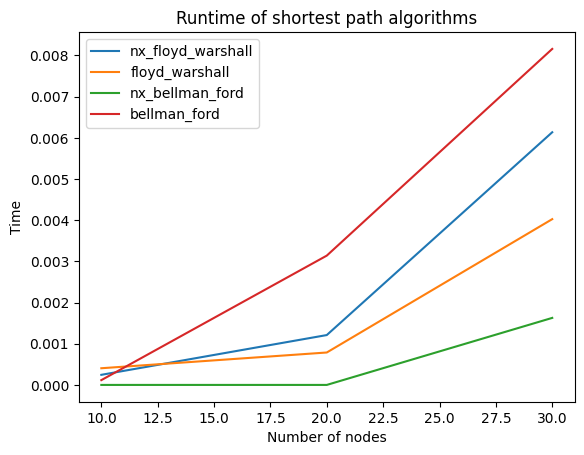

In [69]:
range_=[10,20,30]
times={'nx_floyd_warshall':{range__ : [] for range__ in range_}, 
       'floyd_warshall':{range__ : [] for range__ in range_},
         'nx_bellman_ford':{range__ : [] for range__ in range_},
         'bellman_ford':{range__ : [] for range__ in range_}}

for j in range(100):
    for i in range_:
        G = gnp_random_connected_graph(i, 0.4, True, False)
        start = time.time()
        _=floyd_warshall(G)
        end = time.time()
        times['floyd_warshall'][i].append(end-start)
        start = time.time()
        _=bellman_ford(G, 0)
        end = time.time()
        times['bellman_ford'][i].append(end-start)
        start = time.time()
        _=floyd_warshall_predecessor_and_distance(G)
        end = time.time()
        times['nx_floyd_warshall'][i].append(end-start)
        start = time.time()
        _=bellman_ford_predecessor_and_distance(G, 0)
        end = time.time()
        times['nx_bellman_ford'][i].append(end-start)

for key in times.keys():
    for k in times[key].keys():
        times[key][k] = sum(times[key][k])/len(times[key][k])
    times[key]=list(times[key].values())

plt.plot(range_, times['nx_floyd_warshall'], label='nx_floyd_warshall')
plt.plot(range_, times['floyd_warshall'], label='floyd_warshall')
plt.plot(range_, times['nx_bellman_ford'], label='nx_bellman_ford')
plt.plot(range_, times['bellman_ford'], label='bellman_ford')
plt.legend()
plt.xlabel('Number of nodes')
plt.ylabel('Time')
plt.title('Runtime of shortest path algorithms')
plt.show()